In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the heart disease dataset
data = pd.read_csv("/content/dataset.csv")

data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Get information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Check for missing values
data.isnull().sum()



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Compute the correlation matrix
data.corr()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<ipython-input-11-ab16344c9078>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, palette='viridis')


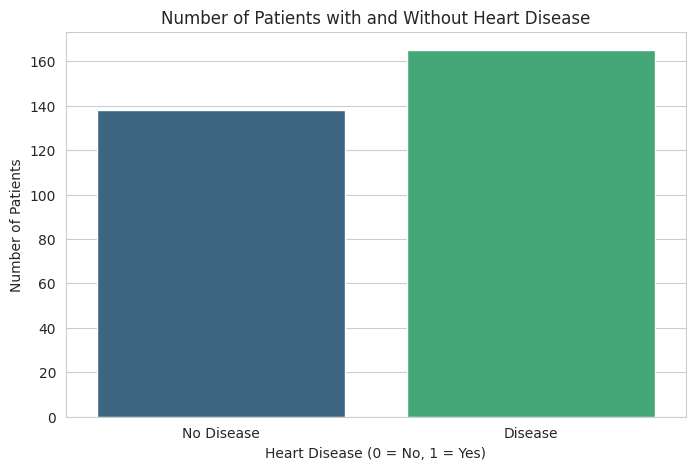

In [ ]:
# Import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style('whitegrid')

# Count the number of patients with and without heart disease
heart_disease_counts = data['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, palette='viridis')
plt.title('Number of Patients with and Without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()


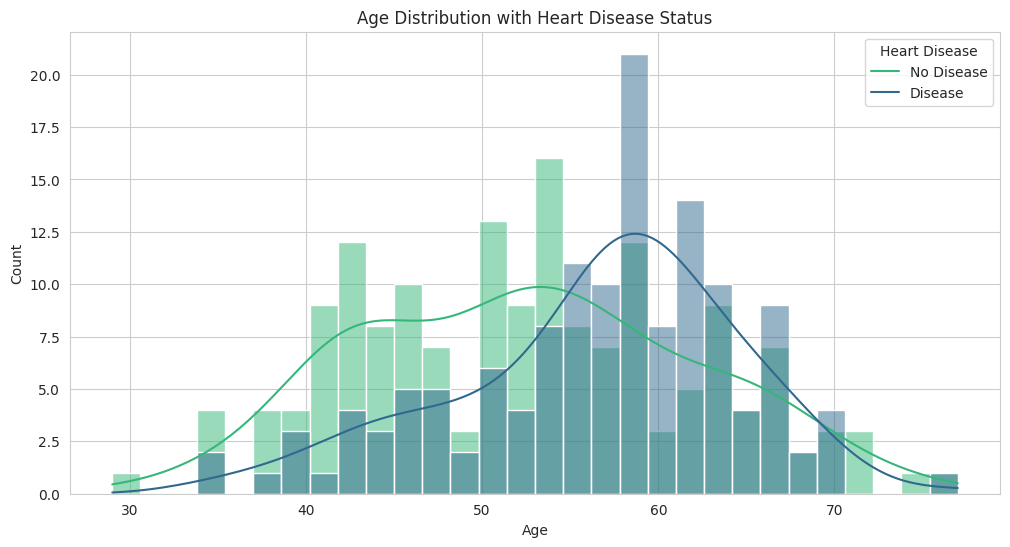

In [ ]:
# Plot the distribution of age based on heart disease presence
plt.figure(figsize=(12, 6))
sns.histplot(data, x='age', hue='target', bins=30, kde=True, palette='viridis', alpha=0.5)
plt.title('Age Distribution with Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


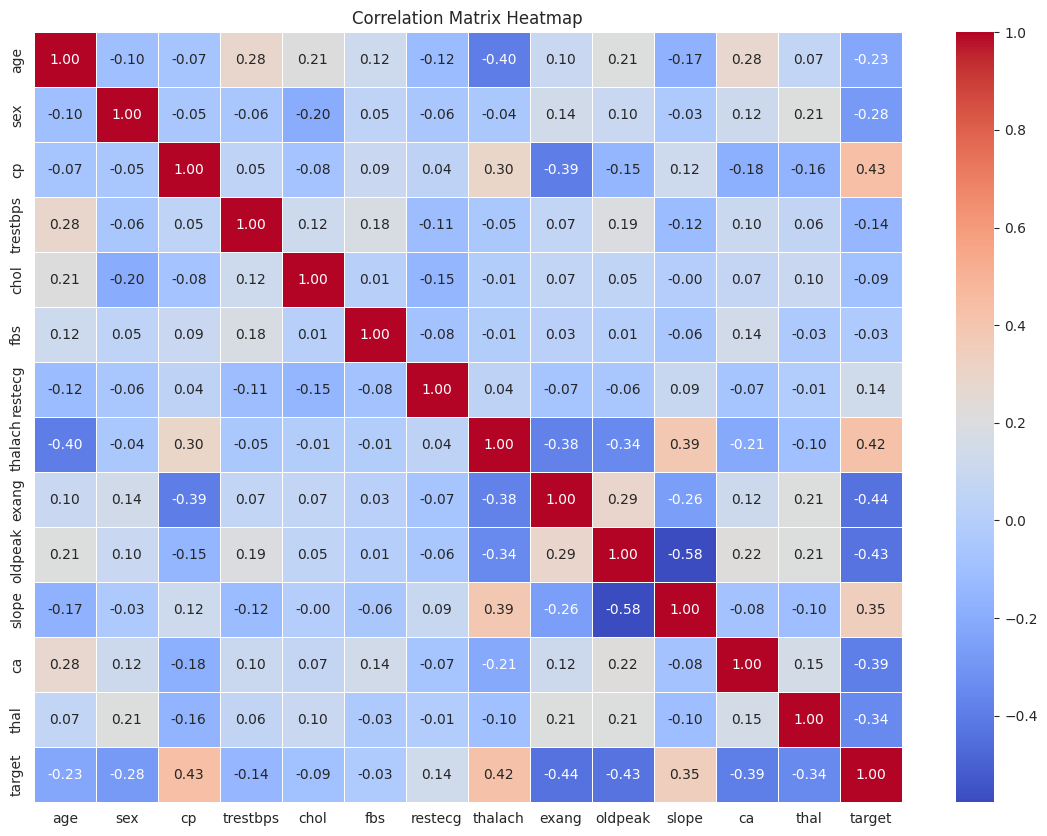

In [ ]:
data.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
#Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing datasets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



Training set shape: (212, 13)
Testing set shape: (91, 13)


In [ ]:
# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=200, solver='liblinear') # Using 'liblinear' solver for binary classification

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Print model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("Model Coefficients:")
print(coefficients)


Model Coefficients:
     Feature  Coefficient
10     slope     0.812472
2         cp     0.800798
6    restecg     0.635668
5        fbs     0.348632
7    thalach     0.020827
0        age     0.011700
4       chol    -0.001810
3   trestbps    -0.006294
9    oldpeak    -0.493357
8      exang    -1.010080
11        ca    -1.042742
1        sex    -1.113596
12      thal    -1.139346


In [ ]:
# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Display the first few predictions
print("First few predictions:", y_pred[:10])


First few predictions: [0 1 1 0 1 1 1 0 0 0]


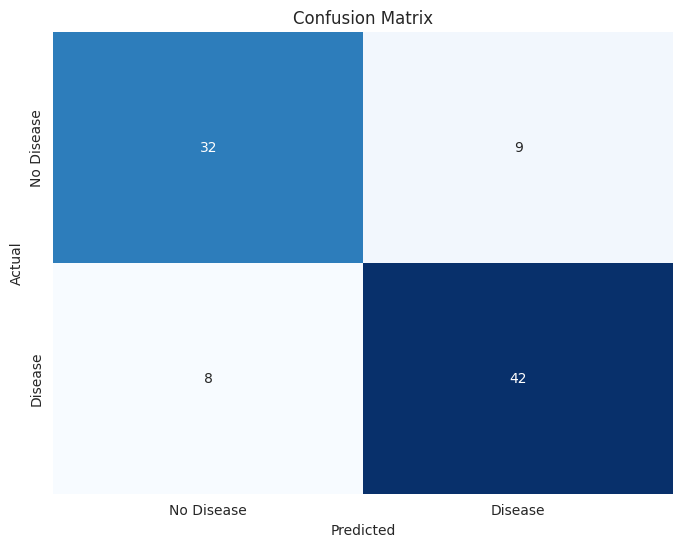

In [ ]:
# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Classification report
class_report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
print("Classification Report:")
print(class_report)


Accuracy Score: 0.81
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.80      0.78      0.79        41
     Disease       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
#Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from graphviz import Source
from IPython.display import display


In [ ]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing datasets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (212, 13)
Testing set shape: (91, 13)


In [ ]:
# Initialize the decision tree model
dt_model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4)  # Adjust `max_depth` as needed

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Display the first few predictions
print("First few predictions:", y_pred[:10])


First few predictions: [0 1 1 0 1 1 1 0 0 0]


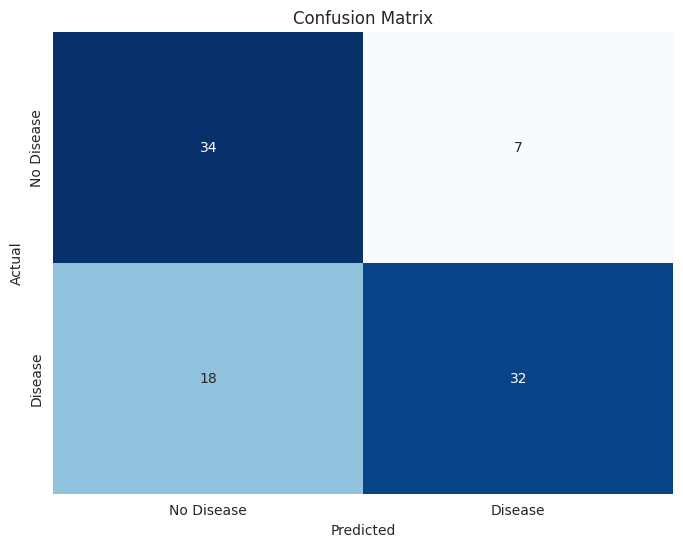

In [ ]:
# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Classification report
class_report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
print("Classification Report:")
print(class_report)


Accuracy Score: 0.73
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.65      0.83      0.73        41
     Disease       0.82      0.64      0.72        50

    accuracy                           0.73        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.75      0.73      0.72        91



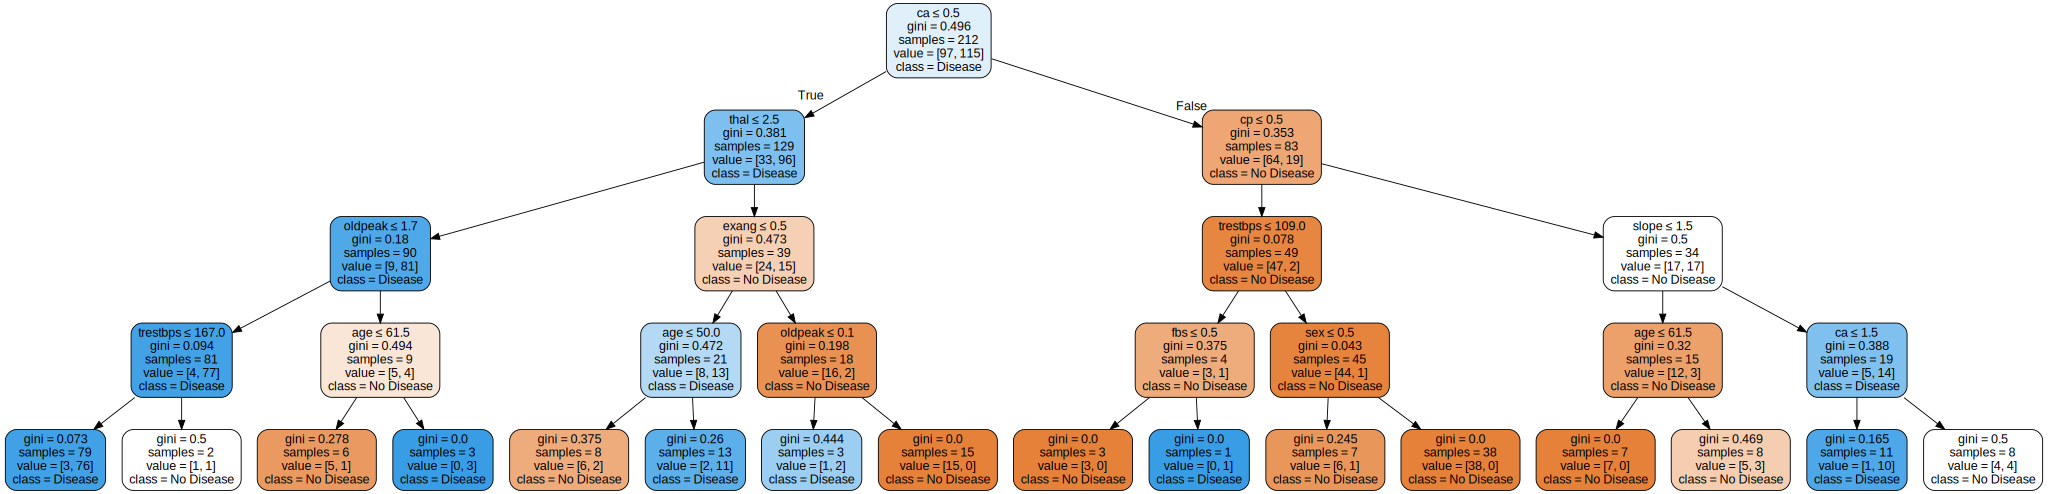

In [ ]:
# Visualize the decision tree using Graphviz
# Install the graphviz package if not already installed
# pip install graphviz

# Export the decision tree to a dot format
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = Source(dot_data)

# Display the graph
display(graph)


In [ ]:
#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import display


In [ ]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing datasets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (212, 13)
Testing set shape: (91, 13)


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, criterion='gini')  # Adjust hyperparameters as needed

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Display the first few predictions
print("First few predictions:", y_pred[:10])


First few predictions: [0 1 1 0 1 1 1 0 0 1]


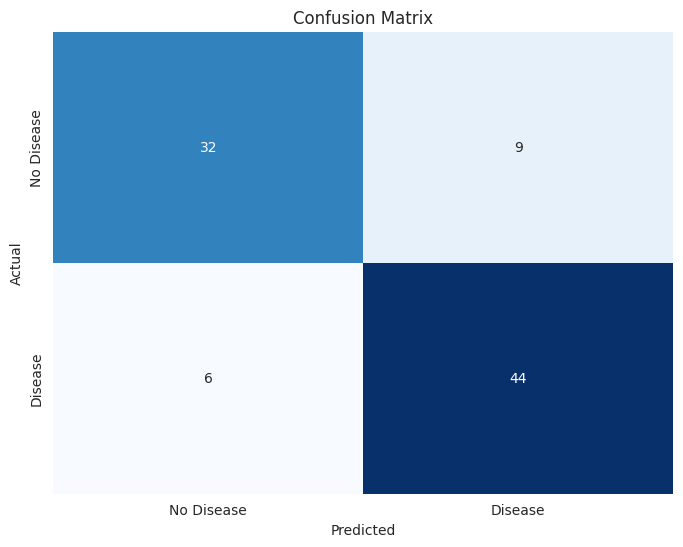

In [ ]:
# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Classification report
class_report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
print("Classification Report:")
print(class_report)


Accuracy Score: 0.84
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.84      0.78      0.81        41
     Disease       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



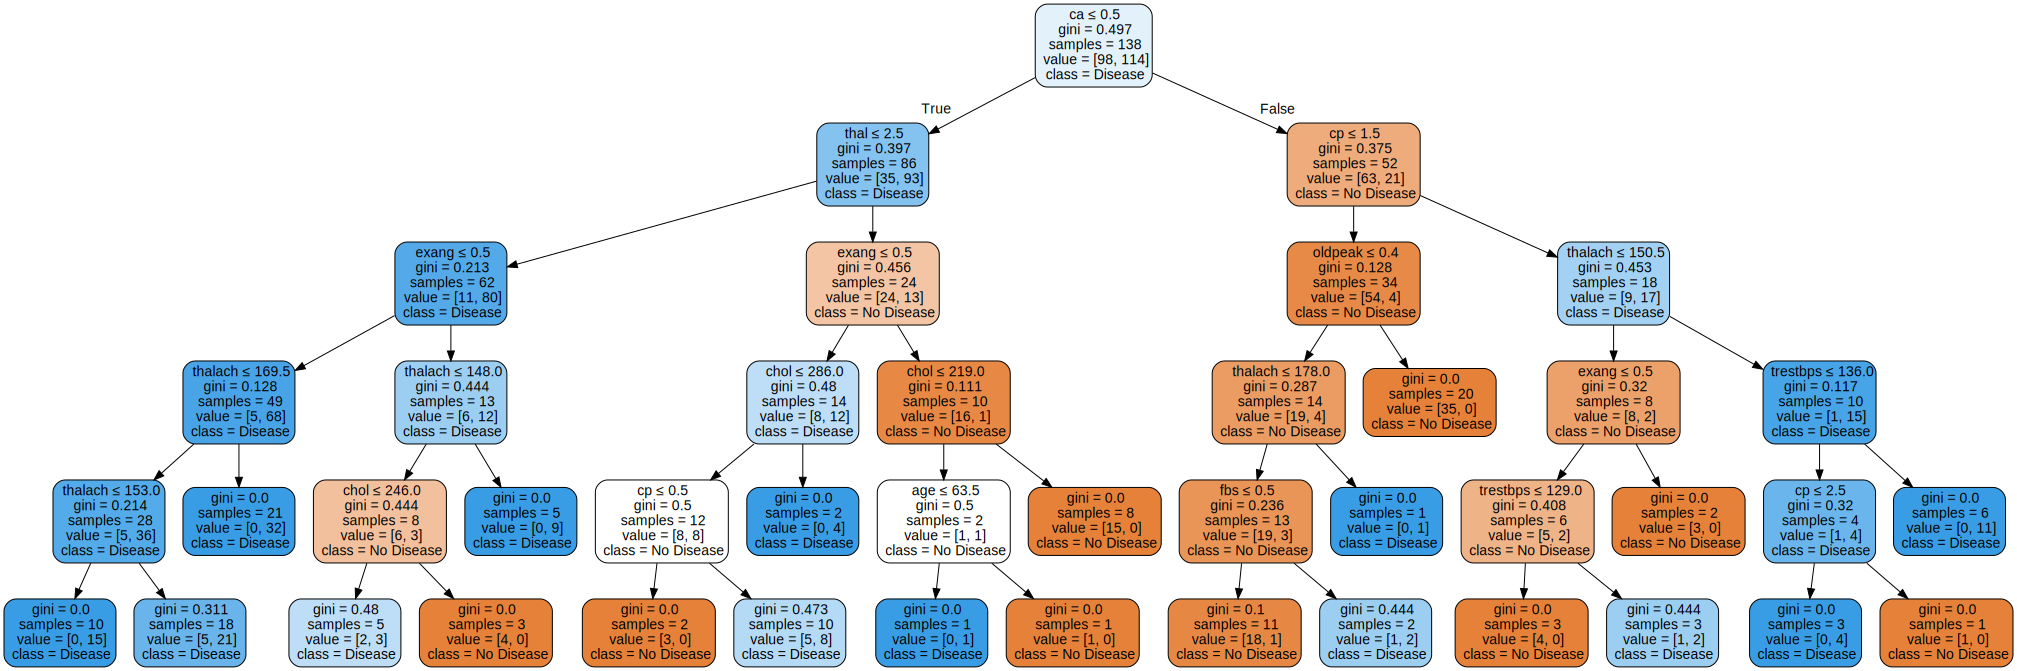

In [ ]:
# Visualize one of the decision trees in the Random Forest using Graphviz
# Export one of the decision trees to a dot format
estimator = rf_model.estimators_[0]  # Select the first tree in the forest

dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = Source(dot_data)

# Display the graph
display(graph)


In [ ]:
#Selecting the best model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import display


In [ ]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
log_model.fit(X_train, y_train)

# Predict on the test set
log_pred = log_model.predict(X_test)

# Confusion Matrix
log_conf_matrix = confusion_matrix(y_test, log_pred)

# Classification Report
log_class_report = classification_report(y_test, log_pred, target_names=['No Disease', 'Disease'])

# Calculate Accuracy
log_accuracy = accuracy_score(y_test, log_pred)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

# Display Classification Report
print("Logistic Regression Classification Report:")
print(log_class_report)


Logistic Regression Accuracy: 0.81
Logistic Regression Classification Report:
              precision    recall  f1-score   support

  No Disease       0.80      0.78      0.79        41
     Disease       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4)

# Fit the model
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt_model.predict(X_test)

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

# Classification Report
dt_class_report = classification_report(y_test, dt_pred, target_names=['No Disease', 'Disease'])

# Calculate Accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Display Classification Report
print("Decision Tree Classification Report:")
print(dt_class_report)


Decision Tree Accuracy: 0.73
Decision Tree Classification Report:
              precision    recall  f1-score   support

  No Disease       0.65      0.83      0.73        41
     Disease       0.82      0.64      0.72        50

    accuracy                           0.73        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.75      0.73      0.72        91



In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, criterion='gini')

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Classification Report
rf_class_report = classification_report(y_test, rf_pred, target_names=['No Disease', 'Disease'])

# Calculate Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Display Classification Report
print("Random Forest Classification Report:")
print(rf_class_report)


Random Forest Accuracy: 0.84
Random Forest Classification Report:
              precision    recall  f1-score   support

  No Disease       0.84      0.78      0.81        41
     Disease       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:
#Calculate Recall, Precision, and F1 Score for All Models

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, F1 Score for Logistic Regression
log_precision = precision_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

print(f"Logistic Regression Metrics:")
print(f"Precision: {log_precision:.2f}")
print(f"Recall: {log_recall:.2f}")
print(f"F1 Score: {log_f1:.2f}\n")


Logistic Regression Metrics:
Precision: 0.82
Recall: 0.84
F1 Score: 0.83



In [ ]:
# Precision, Recall, F1 Score for Decision Tree
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print(f"Decision Tree Metrics:")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}\n")


Decision Tree Metrics:
Precision: 0.82
Recall: 0.64
F1 Score: 0.72



In [ ]:
# Precision, Recall, F1 Score for Random Forest
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(f"Random Forest Metrics:")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}\n")


Random Forest Metrics:
Precision: 0.83
Recall: 0.88
F1 Score: 0.85



In [ ]:
# Visualize Confusion Matrices Using Heatmaps

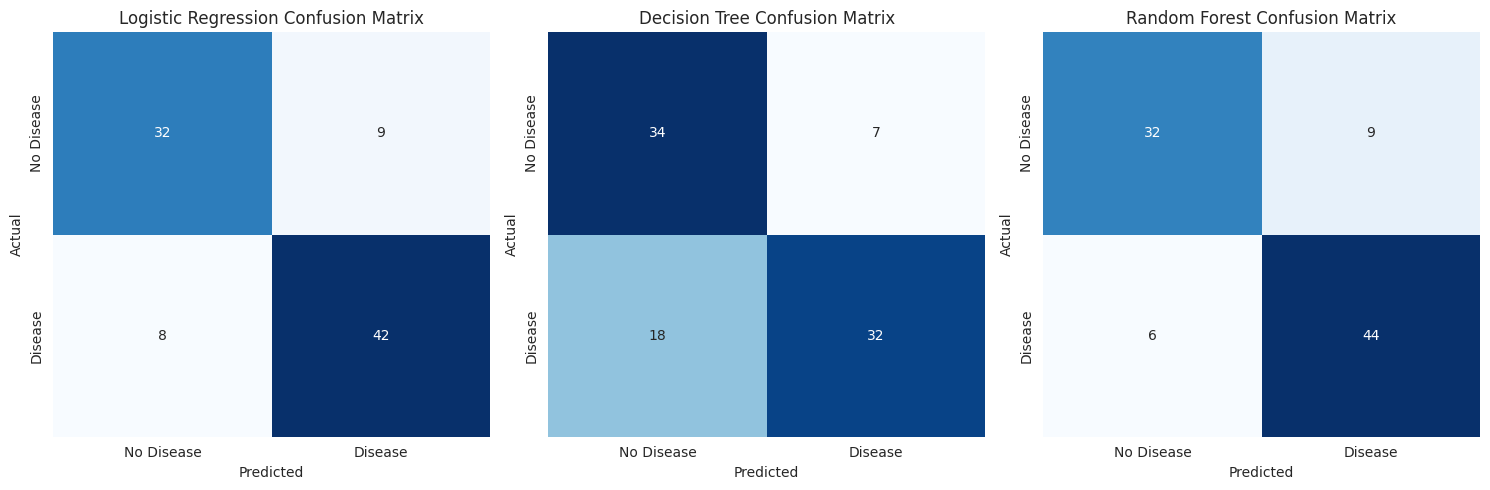

In [ ]:
# Plot Confusion Matrices for All Models
plt.figure(figsize=(15, 5))

# Logistic Regression Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(log_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Decision Tree Confusion Matrix
plt.subplot(1, 3, 2)
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
#Select the Best Model Based on Metrics

# Print the overall performance of each model
print("Model Performance Summary:")
print(f"Logistic Regression: Accuracy={log_accuracy:.2f}, Precision={log_precision:.2f}, Recall={log_recall:.2f}, F1 Score={log_f1:.2f}")
print(f"Decision Tree: Accuracy={dt_accuracy:.2f}, Precision={dt_precision:.2f}, Recall={dt_recall:.2f}, F1 Score={dt_f1:.2f}")
print(f"Random Forest: Accuracy={rf_accuracy:.2f}, Precision={rf_precision:.2f}, Recall={rf_recall:.2f}, F1 Score={rf_f1:.2f}")

# Select the best model based on accuracy, precision, recall, and F1 score
best_model = 'Random Forest' if rf_accuracy > max(log_accuracy, dt_accuracy) else 'Logistic Regression' if log_accuracy > dt_accuracy else 'Decision Tree'

print(f"\nThe best model based on the evaluation metrics is: {best_model}")


Model Performance Summary:
Logistic Regression: Accuracy=0.81, Precision=0.82, Recall=0.84, F1 Score=0.83
Decision Tree: Accuracy=0.73, Precision=0.82, Recall=0.64, F1 Score=0.72
Random Forest: Accuracy=0.84, Precision=0.83, Recall=0.88, F1 Score=0.85

The best model based on the evaluation metrics is: Random Forest
